# Create a waterbalance from Excel template<a id="top"></a>

_Developed by Davíd Brakenhoff (Artesia) on July 19, 2019_
<hr>
This notebook shows how a waterbalance can be set up using an Excel template. The template is located in the data directory in the repository.

## Contents
- [Loading input from Excel](#1)
    - [Modelstructure](#1.1)
    - [Timeseries](#1.2)
    - [Parameters](#1.3)
- [Creating the EAG object](#2)
- [Adding Timeseries from DataFrame](#3)
- [Simulate the waterbalance](#4)
- [Visualize the results](#5)

Import the necessary modules

In [1]:
import matplotlib.pyplot as plt
import waterbalans as wb

## [Loading input from Excel](#top)<a id="1"></a>

A function is included in `wb.utils` called `get_model_input_from_excel` which reads the excel file and converts it into DataFrames that can be used to create the model.

In [2]:
# Get ModelStructure, TimeSeries, and Parameters from example excel file
excelfile = r"../../data/reference_inputfiles_for_waterbalance.xlsx"
df_ms, df_ts, df_params = wb.utils.get_model_input_from_excel(excelfile)

### [Modelstructure](#top)<a id="1.1"></a>
The first DataFrame is the modelstructure, which includes the Bucket codes, unique IDs and areas:

In [3]:
df_ms

,EAGID,EAGCode,BakjeID,BakjeOmschrijving,BakjePyCode,OppWaarde,Eenheid
0,1207,2140-EAG-3,1207045691,OnverhardOngedraineerd,Onverhard,85972,m^2
1,1207,2140-EAG-3,1207045690,Verhard,Verhard,84288,m^2
2,1207,2140-EAG-3,1207000000,Water,Water,141669,m^2


### [Timeseries](#top)<a id="1.2"></a>

The second DataFrame contains the timeseries. Timeseries can be added manually (see the timeseries notebook) or by providing a table like the one below. The table is parsed by `e.add_series_from_database`. This function first looks at the ParamType which tells Python what type of Timeseries the user wants to add. The options are:
- **Constant**: constant value over time
- **ValueSeries**: a constant value starting from a certain date (StartDag) each year. Each ValueSeries for the same flux is combined to form a complete timeseries (like a square wave).
- **FEWS**: series is loaded from FEWS database using the information from WaardeAlfa
- **KNMI**: data is downloaded from KNMI website

In this case we only  have a few Constants and ValueSeries for the hTarget levels of the surface water bucket.

In [4]:
df_ts

,EAGID,EAGCode,BakjeID,Laagvolgorde,ClusterType,ParamType,Waarde,WaardeAlfa,StartDag,Eenheid
0,1207,2140-EAG-3,1207045690,1,Qkwel,Constant,-0.83,NaN,NaN,mm/dag
1,1207,2140-EAG-3,1207045691,1,Qkwel,Constant,-0.83,NaN,NaN,mm/dag
2,1207,2140-EAG-3,1207000000,1,Qkwel,Constant,0.00,NaN,NaN,mm/dag
3,1207,2140-EAG-3,1207000000,1,Qwegz,Constant,0.83,NaN,NaN,mm/dag
4,1207,2140-EAG-3,-9999,1,Uitlaat1,Constant,-500.00,NaN,NaN,m^3/dag
5,1207,2140-EAG-3,1207000000,1,hTargetMax,ValueSeries,-1.70,NaN,01-05,mNAP
6,1207,2140-EAG-3,1207000000,1,hTargetMax,ValueSeries,-1.70,NaN,01-10,mNAP
7,1207,2140-EAG-3,1207000000,1,hTargetMax,ValueSeries,-1.70,NaN,15-03,mNAP
8,1207,2140-EAG-3,1207000000,1,hTargetMax,ValueSeries,-1.70,NaN,15-08,mNAP
9,1207,2140-EAG-3,1207000000,1,hTargetMin,ValueSeries,-1.75,NaN,01-05,mNAP


### [Parameters](#top)<a id="1.3"></a>
The final DataFrame contains the bucket parameters:

In [5]:
df_params

,EAGID,EAGCode,BakjeID,Laagvolgorde,ParamCode,Waarde,Eenheid
0,1207,2140-EAG-3,1207045691,1,EvapMin,0.750,-
1,1207,2140-EAG-3,1207045691,1,Evap,1.000,-
2,1207,2140-EAG-3,1207045691,1,hInit,0.500,-
3,1207,2140-EAG-3,1207045691,1,hMax,1.000,-
4,1207,2140-EAG-3,1207045691,1,por,0.200,-
5,1207,2140-EAG-3,1207045691,1,RFacIn,0.020,-
6,1207,2140-EAG-3,1207045691,1,RFacOut,0.500,-
7,1207,2140-EAG-3,1207045690,2,hInit,0.500,-
8,1207,2140-EAG-3,1207045690,2,hMax,1.000,-
9,1207,2140-EAG-3,1207045690,2,por,0.200,-


## [Creating the EAG object](#top)<a id="2"></a>

Get the EAG ID and name from the modelstructure DataFrame. For creating the EAG object from a DataFrame, there is a function called `wb.create_eag` which requires an ID, a name, and a DataFrame containing the modelstructure information.

In [6]:
# Get ID and Name
eag_id = df_ms.loc[0, "EAGID"]
eag_name = df_ms.loc[0, "EAGCode"]

In [7]:
# Create EAG
e = wb.create_eag(eag_id, eag_name, df_ms)

2019-07-19 14:05:13,377 | create_eag - INFO : Creating EAG object for '2140-EAG-3'


## [Adding Timeseries from DataFrame](#top)<a id="3"></a>

For adding Timeseries from a table like the one shown above, use the `e.add_series_from_database` method. Optionally provide tmin and tmax to specify the period you would like to simulate.

In [8]:
# Time options
tmin = "1996"
tmax = "2015"

In [9]:
# Add TimeSeries
e.add_series_from_database(df_ts, tmin=tmin, tmax=tmax)

2019-07-19 14:05:13,419 | add_series_from_database - INFO : Parsing timeseries from database export and adding to EAG.


Timeseries that the user wishes to add manually can be stored in the Excel file under the `extra_reeksen` tab. Loading those series is done with `wb.utils.get_extra_series_from_excel`. The naming of these series determines how these series are picked up. The name follows the following structure: `Name<#>|Your_description`. 

The following names are recognized by Python:
- Neerslag (precipitation)
- Verdamping (evaporation)
- Peil (water level)
- Uitlaat (outward flux) - entered positive, but will be converted by Python to a negative (outward) flux.
- Inlaat (inward flux)

Anything else is added to the surface water bucket as an external flux (positive means water coming in, negative means water going out).

Read the extra timeseries and add to the EAG object with `wb.utils.add_timeseries_to_obj`. Note the `overwrite=False` option. If set to True and the name of the series is already present, the existing series will be overwritten wherever the extra timeseries has data. 

In [10]:
# Add extra series (optional)
df_series = wb.utils.get_extra_series_from_excel(excelfile)
wb.utils.add_timeseries_to_obj(e, df_series, tmin=tmin,
                               tmax=tmax, overwrite=False)

2019-07-19 14:05:14,869 | add_timeseries - INFO : Adding timeseries 'Inlaat1' to EAG manually
2019-07-19 14:05:14,878 | add_timeseries - INFO : Adding timeseries 'Uitlaat2' to EAG manually
2019-07-19 14:05:14,879 | add_timeseries - INFO : Filled 5631 NaN-values with '0.0' in series Uitlaat2.
2019-07-19 14:05:14,885 | add_timeseries - INFO : Adding timeseries 'Uitlaat3' to EAG manually
2019-07-19 14:05:14,886 | add_timeseries - INFO : Filled 469 NaN-values with '0.0' in series Uitlaat3.
2019-07-19 14:05:14,892 | add_timeseries - INFO : Adding timeseries 'Peil' to EAG manually
2019-07-19 14:05:14,894 | add_timeseries - INFO : Filled 517 NaN-values with 'ffill' in series Peil.
2019-07-19 14:05:14,903 | add_timeseries - INFO : Adding timeseries 'q_cso' to EAG manually
2019-07-19 14:05:14,915 | add_timeseries - INFO : Adding timeseries 'Neerslag' to EAG manually
2019-07-19 14:05:14,916 | add_timeseries - INFO : Filled 1 NaN-values with '0.0' in series Neerslag.
2019-07-19 14:05:14,929 | add

Note that NaNs are filled in using certain logic which differs per type of timeseries. These actions are logged to the console for the user to verify. If the user wishes to use different logic, the series will have to be added manually using `e.add_timeseries`. 

## [Simulate the waterbalance](#top)<a id="4"></a>

Simulate the waterbalance between tmin and tmax.

In [11]:
# Simulate
e.simulate(df_params, tmin=tmin, tmax=tmax)

2019-07-19 14:05:14,956 | simulate - INFO : Simulating: 2140-EAG-3...
2019-07-19 14:05:14,961 | simulate - INFO : Simulating the waterbalance for bucket: Onverhard 1207045691
2019-07-19 14:05:15,302 | simulate - INFO : Simulating the waterbalance for bucket: Verhard 1207045690
2019-07-19 14:05:15,670 | simulate - INFO : Simulating the waterbalance for bucket: Water 1207000000
2019-07-19 14:05:15,681 | simulate - WARNING : 'QInMax_1' is equal to 0. Assuming this means there is no limit to inflow.
2019-07-19 14:05:19,126 | simulate - INFO : Simulation succesfully completed in 4.2s.


## [Visualize the results](#top)<a id="5"></a>

Plot the aggregated fluxes per month as a bar chart.

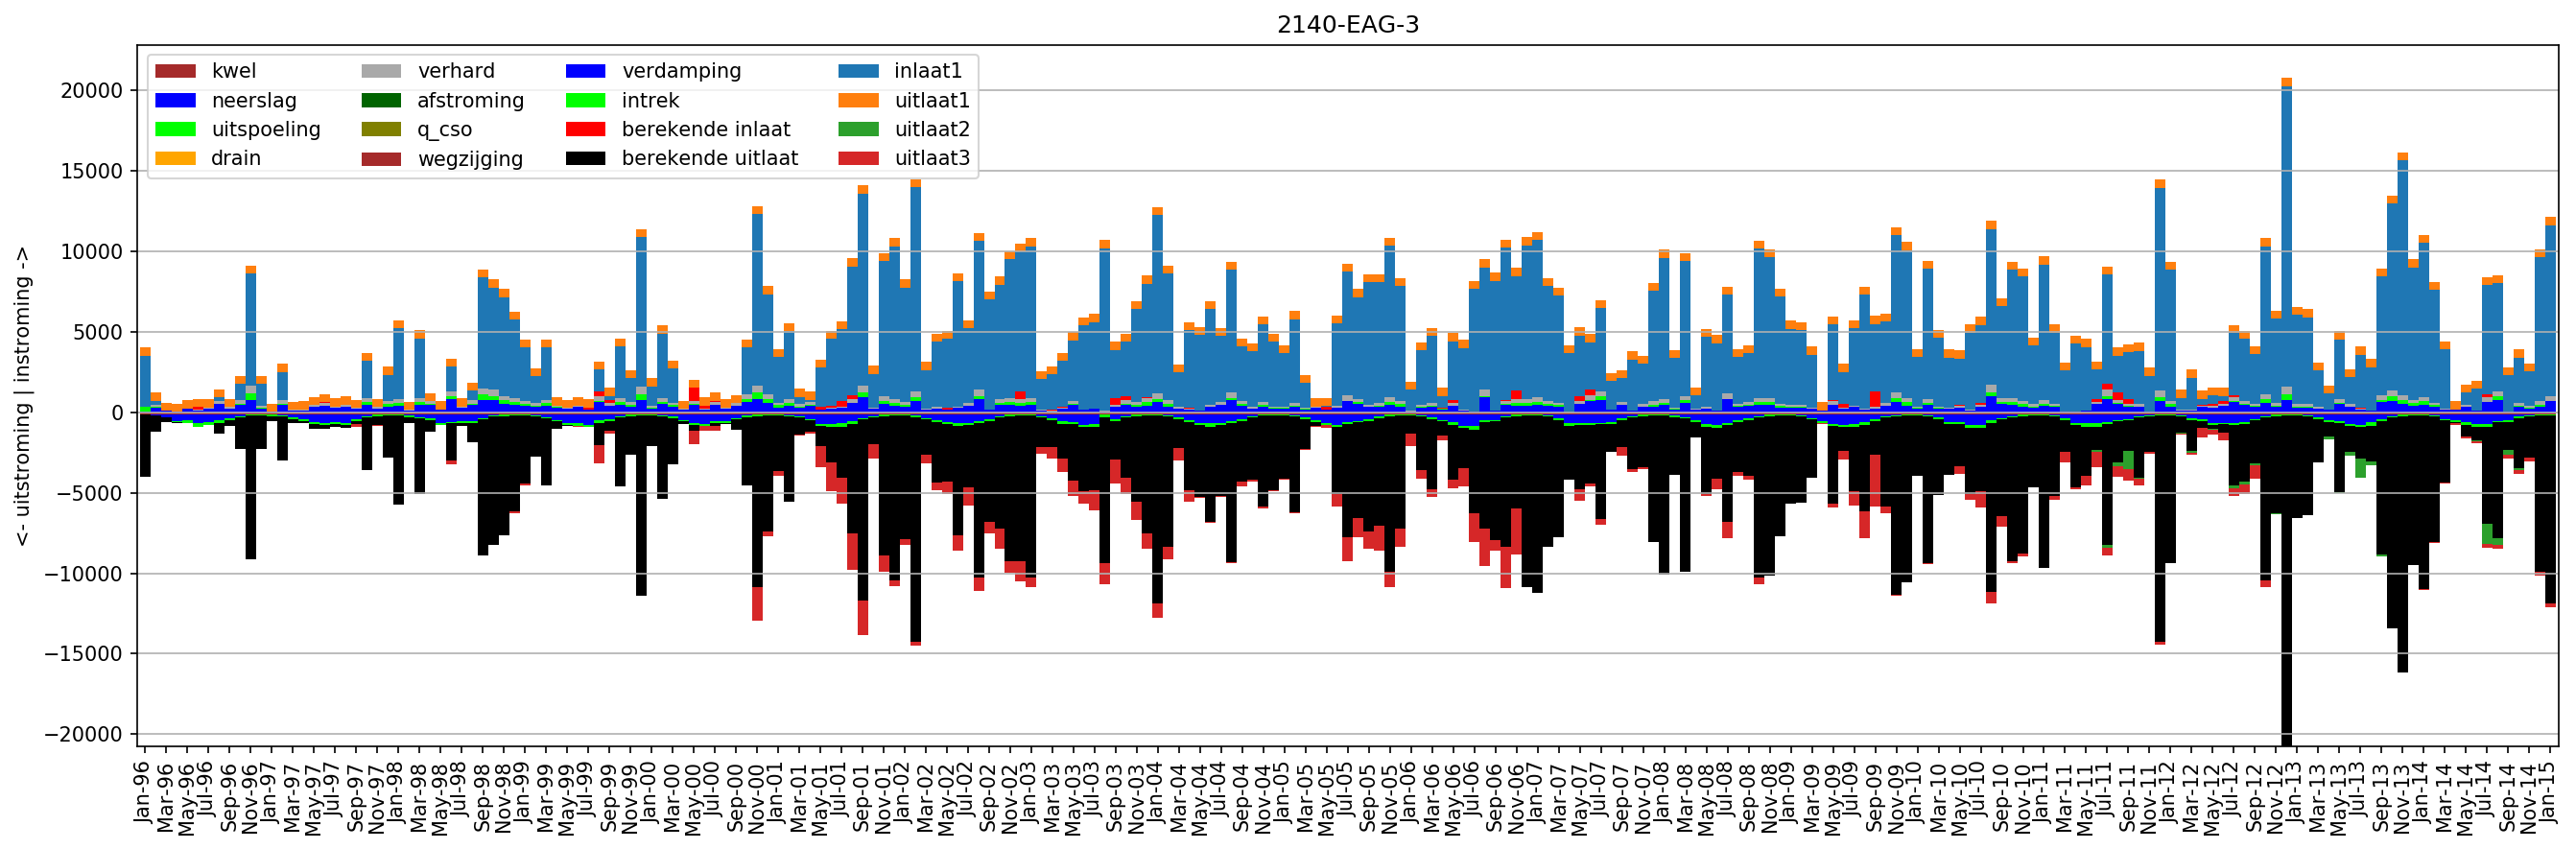

In [13]:
# Plot aggregated fluxes
e.plot.aggregated(tmin=tmin, tmax=tmax)